In [3]:
NAME = "Matthew A. Hernandez"
# University of Arizona email address
EMAIL = "mah8@arizona.edu"
# Names of any collaborators.  Write N/A if none.
COLLABORATORS = "N/A"

## Class Competition
Description, Evaluation, and Data Set taken from the class competition site.

## Description
Marvin works at the last Blockbusta Videoz (a fictional video rental shop) where his task is to classify movie and TV show reviews to help curate a special section of the store.

One day while perusing his favorite website, Marvin came upon a post about someone who secretly automated their job and then quietly took off on a long (paid) vacation. Inspired, Marvin set aside a portion of his salary to hire a developer to write a few scripts to scrape movie reviews from various sources. It's a bit noisy, but aggregating many reviews has cut the time he previously spent on his job by half.

Now, after reading an article about AI, Marvin wants to take things a step further: he is searching for a program that can determine a) whether or not a piece of text is a movie/TV show review and b) whether or not each review is positive (the movie/TV show is recommended) or negative (the movie/TV show should be avoided).

Marvin has put together a competition and advertised it on Fraggle (a fictional platform for competitive data science).

## Evaluation
blah blah

## Data Set
| **COLUMN** | **DESCRIPTION**                       | 
|-----------|---------------------------------------|
|  ID        | Not a movie or TV show review         | 
|  1        | A positive movie or TV show review    |
|  2        | A negative movie or TV show review    |



| **LABEL** | **DESCRIPTION**                       | 
|-----------|---------------------------------------|
|  0        | Not a movie or TV show review         | 
|  1        | A positive movie or TV show review    |
|  2        | A negative movie or TV show review    |

## Setup and Imports

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

train_file_path = "../data/train.csv"
test_file_path = "../data/test.csv"

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the data

In [188]:
def read_reviews(reviews_path):
    '''
    Reads a CSV file and returns a dataframe.
    
    @param reviews_path:
    @return: pd.DataFrame
    '''
    df = pd.read_csv(reviews_path)
    return df

In [189]:
df_train = read_reviews(train_file_path)
df_test = read_reviews(test_file_path)
df_train.head()

,ID,TEXT,LABEL
0,7850790573542594519,If you love good films don't ever buy this pei...,2
1,9392069522632994700,The 33 percent of the nations nitwits that sti...,2
2,5083704536542443514,I saw Anatomy years ago -- dubbed at a friends...,1
3,12418349755186772171,Dark Remains is a home run plain and simple. T...,1
4,12144957944004619479,Feh. This movie started out in an interesting ...,2


In [154]:
print(f"Dataframe shape: {df_train.shape[0]}")
print(f"Dataframe types: \n{df_train.dtypes}")

Dataframe shape: 70317
Dataframe types: 
ID             uint64
TEXT           object
LABEL           int64
TEXT_LENGTH     int64
dtype: object


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70317 entries, 0 to 70316
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      70317 non-null  uint64
 1   TEXT    70311 non-null  object
 2   LABEL   70317 non-null  int64 
dtypes: int64(1), object(1), uint64(1)
memory usage: 1.6+ MB


Text column is missing 6 values. The shape of the dataframe is 70317. The data set is relatively clean, so no additional preprocessing is needed much.

In [171]:
df_train['TEXT'].fillna(value='Unknown', inplace=True)

**Drop missing values.** Other option would be to replace the Text columns with an 'Unknown' value.

In [172]:
# verify the changes were made
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70317 entries, 0 to 70316
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           70317 non-null  uint64
 1   TEXT         70317 non-null  object
 2   LABEL        70317 non-null  int64 
 3   TEXT_LENGTH  70317 non-null  int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 2.1+ MB


In [149]:
df_train.describe()

,ID,LABEL,TEXT_LENGTH
count,7.031700e+04,70317.000000,70317.000000
mean,9.237206e+18,0.813687,857.403046
std,5.341639e+18,0.831365,998.873002
min,5.764730e+14,0.000000,1.000000
25%,4.592511e+18,0.000000,195.000000
50%,9.273194e+18,1.000000,607.000000
75%,1.387591e+19,2.000000,1096.000000
max,1.844662e+19,2.000000,31731.000000


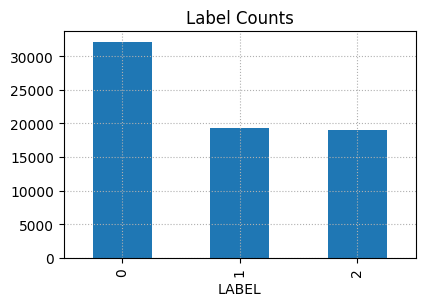

In [182]:
# Plotting
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))

df_train['LABEL'].value_counts().plot(kind='bar', 
                                         title='Label Counts')
plt.grid(True, linestyle='dotted')
plt.show()